First 5 entries:
   Student_ID  CGPA  CIE_SCORE  SEE_SCORE  HOURS_OF_STUDY  GENDER
0         1.0   8.2       42.0       78.0             3.5    Male
1         2.0   7.5       38.0       72.0             2.0  Female
2         3.0   9.0       45.0       85.0             5.0    Male
3         4.0   6.8       35.0       60.0             1.0  Female
4         5.0   8.7       44.0       80.0             4.0    Male

=== MEAN VALUES ===
 CGPA               7.900000
CIE_SCORE         40.500000
SEE_SCORE         73.833333
HOURS_OF_STUDY     3.000000
dtype: float64

=== MEDIAN VALUES ===
 CGPA               7.85
CIE_SCORE         40.50
SEE_SCORE         75.00
HOURS_OF_STUDY     3.00
dtype: float64

=== MODE VALUES ===
 CGPA               6.8
CIE_SCORE         35.0
SEE_SCORE         60.0
HOURS_OF_STUDY     1.0
Name: 0, dtype: float64


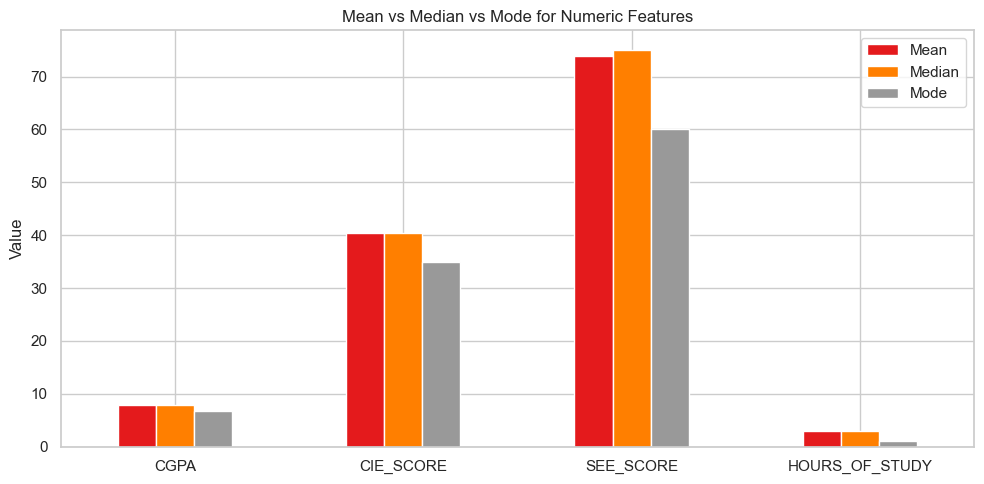

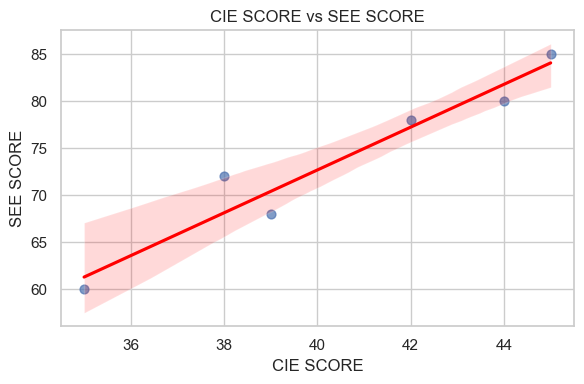

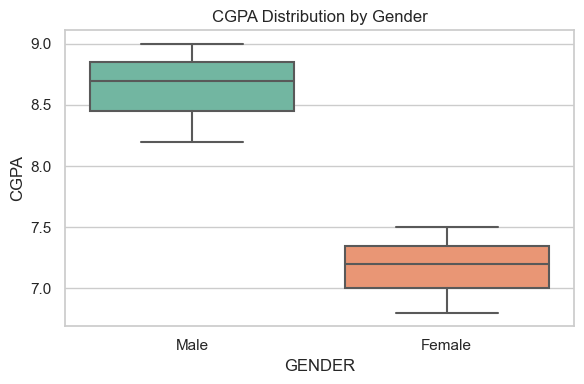

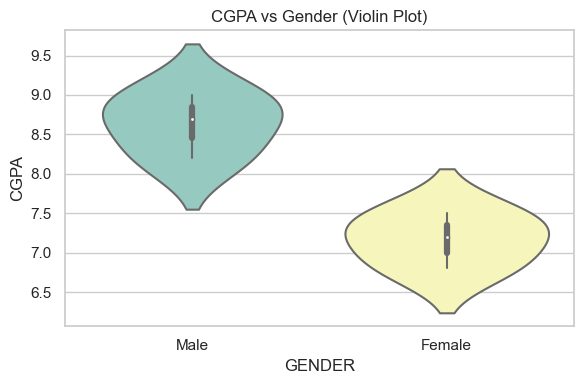

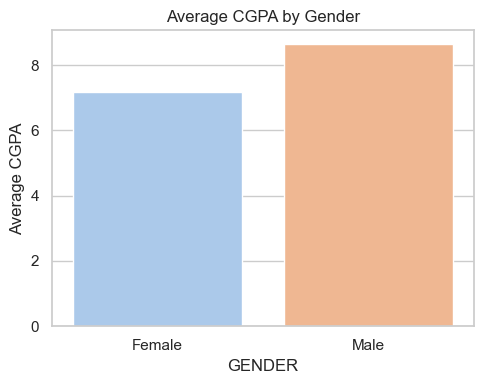

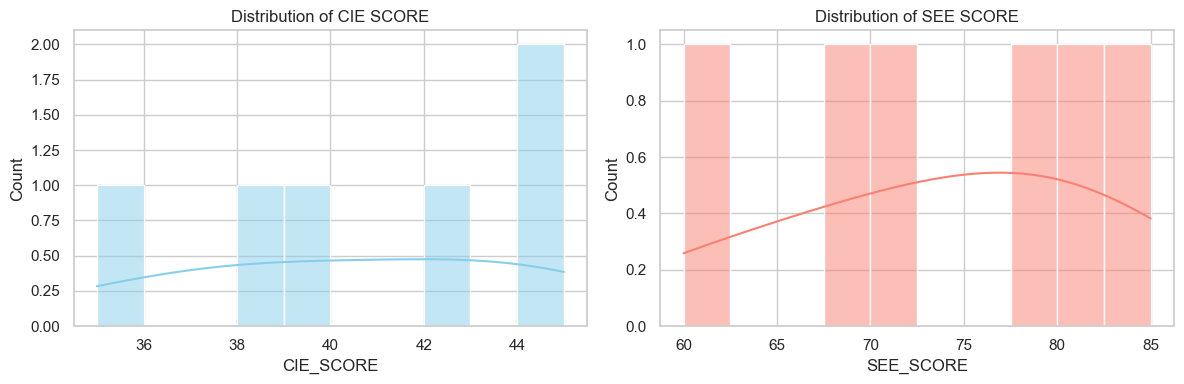

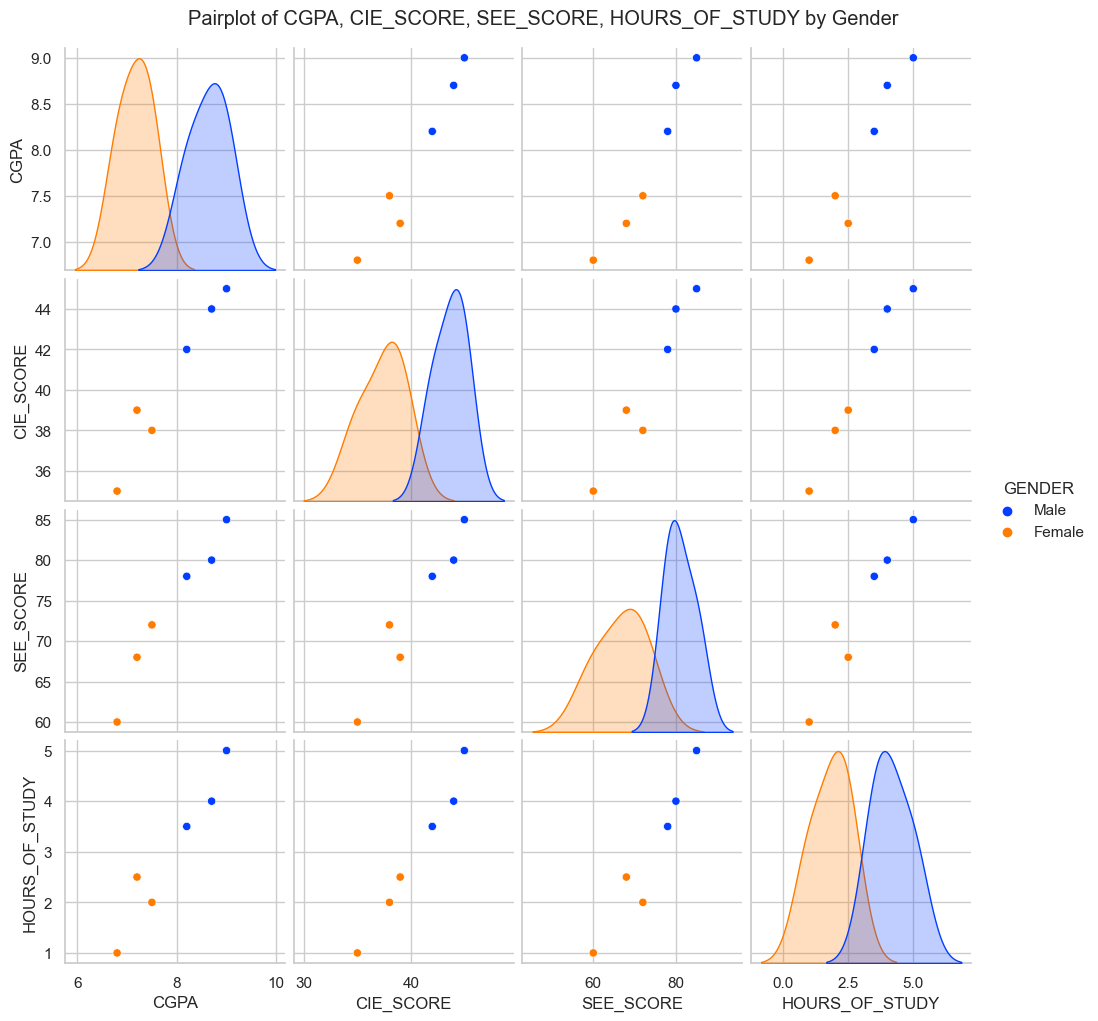

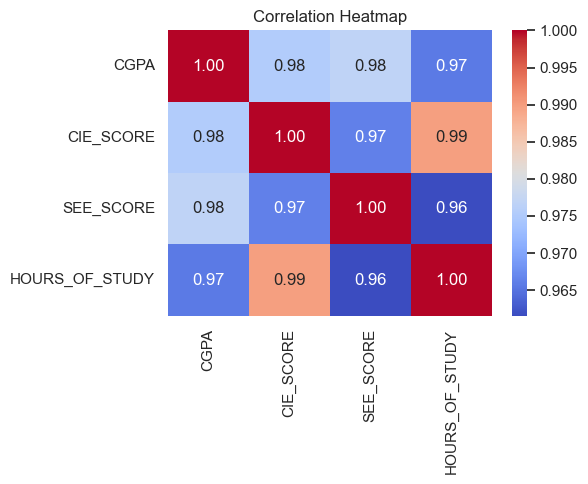

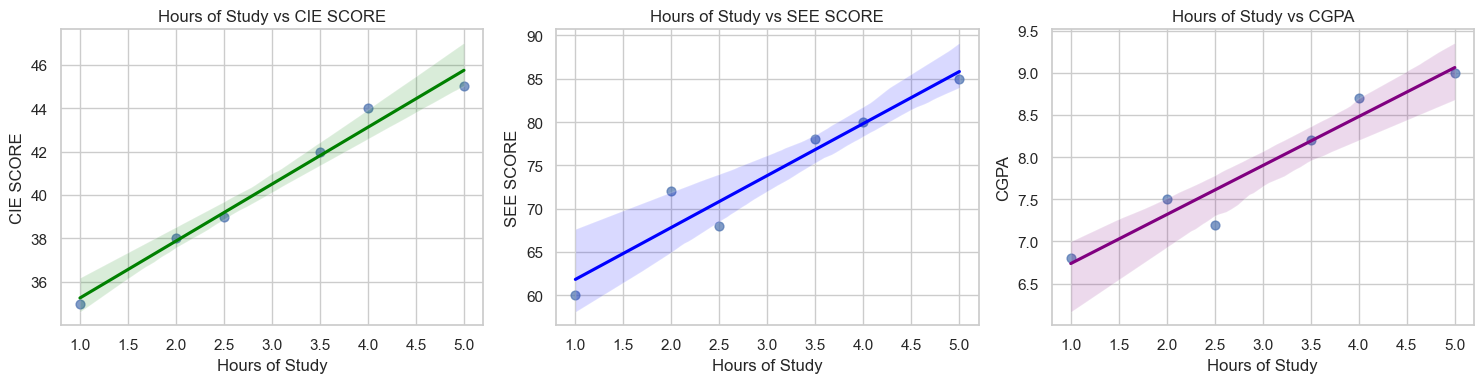

In [2]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("StudentData.csv")


print("First 5 entries:")
print(df.head())

sns.set(style="whitegrid")


mean_values = df[["CGPA", "CIE_SCORE", "SEE_SCORE", "HOURS_OF_STUDY"]].mean()
median_values = df[["CGPA", "CIE_SCORE", "SEE_SCORE", "HOURS_OF_STUDY"]].median()
mode_values = df[["CGPA", "CIE_SCORE", "SEE_SCORE", "HOURS_OF_STUDY"]].mode().iloc[0] 

print("\n=== MEAN VALUES ===\n", mean_values)
print("\n=== MEDIAN VALUES ===\n", median_values)
print("\n=== MODE VALUES ===\n", mode_values)


stats_df = pd.DataFrame({
    'Mean': mean_values,
    'Median': median_values,
    'Mode': mode_values
})

stats_df.plot(kind='bar', figsize=(10,5), colormap='Set1')
plt.title("Mean vs Median vs Mode for Numeric Features")
plt.ylabel("Value")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# ================== VISUALIZATIONS ==================

# 1. CIE vs SEE Score
plt.figure(figsize=(6,4))
sns.regplot(x="CIE_SCORE", y="SEE_SCORE", data=df, scatter_kws={"s":40, "alpha":0.7}, line_kws={"color":"red"})
plt.title("CIE SCORE vs SEE SCORE")
plt.xlabel("CIE SCORE")
plt.ylabel("SEE SCORE")
plt.tight_layout()
plt.show()

# 2. Boxplot of CGPA by GENDER
plt.figure(figsize=(6,4))
sns.boxplot(x="GENDER", y="CGPA", data=df, palette="Set2")
plt.title("CGPA Distribution by Gender")
plt.tight_layout()
plt.show()

# 3. Violin plot CGPA vs GENDER
plt.figure(figsize=(6,4))
sns.violinplot(x="GENDER", y="CGPA", data=df, palette="Set3")
plt.title("CGPA vs Gender (Violin Plot)")
plt.tight_layout()
plt.show()

# 4. Bar plot: Average CGPA by GENDER
avg_cgpa_gender = df.groupby("GENDER")["CGPA"].mean().reset_index()
plt.figure(figsize=(5,4))
sns.barplot(x="GENDER", y="CGPA", data=avg_cgpa_gender, palette="pastel")
plt.title("Average CGPA by Gender")
plt.ylabel("Average CGPA")
plt.tight_layout()
plt.show()

# 5. Histograms for CIE and SEE Scores
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(df["CIE_SCORE"], bins=10, kde=True, color="skyblue")
plt.title("Distribution of CIE SCORE")

plt.subplot(1,2,2)
sns.histplot(df["SEE_SCORE"], bins=10, kde=True, color="salmon")
plt.title("Distribution of SEE SCORE")

plt.tight_layout()
plt.show()

# 6. Pairplot with HOURS_OF_STUDY
sns.pairplot(df, hue="GENDER", vars=["CGPA", "CIE_SCORE", "SEE_SCORE", "HOURS_OF_STUDY"],
             palette="bright", diag_kind="kde")
plt.suptitle("Pairplot of CGPA, CIE_SCORE, SEE_SCORE, HOURS_OF_STUDY by Gender", y=1.02)
plt.show()

# 7. Correlation heatmap
plt.figure(figsize=(6,5))
sns.heatmap(df[["CGPA", "CIE_SCORE", "SEE_SCORE", "HOURS_OF_STUDY"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# 8. Hours of Study vs Scores
fig, axes = plt.subplots(1, 3, figsize=(15,4))

sns.regplot(x="HOURS_OF_STUDY", y="CIE_SCORE", data=df, ax=axes[0], scatter_kws={"s":40, "alpha":0.7}, line_kws={"color":"green"})
axes[0].set_title("Hours of Study vs CIE SCORE")
axes[0].set_xlabel("Hours of Study")
axes[0].set_ylabel("CIE SCORE")

sns.regplot(x="HOURS_OF_STUDY", y="SEE_SCORE", data=df, ax=axes[1], scatter_kws={"s":40, "alpha":0.7}, line_kws={"color":"blue"})
axes[1].set_title("Hours of Study vs SEE SCORE")
axes[1].set_xlabel("Hours of Study")
axes[1].set_ylabel("SEE SCORE")

sns.regplot(x="HOURS_OF_STUDY", y="CGPA", data=df, ax=axes[2], scatter_kws={"s":40, "alpha":0.7}, line_kws={"color":"purple"})
axes[2].set_title("Hours of Study vs CGPA")
axes[2].set_xlabel("Hours of Study")
axes[2].set_ylabel("CGPA")

plt.tight_layout()
plt.show()








In [3]:
import pandas as pd
import numpy as np
from scipy import stats


data = {
    "ID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
    "Age": [25, 37, np.nan, 29, 42, 55, 23, 29, np.nan, 45, np.nan],
    "Gender": ["Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", np.nan, "Female", "Male"],
    "Income": [50000, 62000, 45000, 54000, np.nan, 100000, 52000, 70000, np.nan, 85000, 200000],
    "Occupation": ["Engineer", "Data Scientist", "Product Manager", "Product Manager", "Sales", "Executive",
                   np.nan, "Product Manager", np.nan, "Executive", "Executive"],
    "Years_Employed": [2, 5, 3, np.nan, 8, 30, 1, 6, 15, np.nan, np.nan],
    "Satisfaction_Level": [0.8, 0.6, 0.7, 0.7, 0.5, 0.9, 0.4, 0.7, 0.9, np.nan, np.nan],
    "Purchase_History": ["High", "Medium", "Low", "High", "Low", "High", "Medium", "High", "Low", "High", "High"]
}

df = pd.DataFrame(data)

print("Initial Data:")
print(df)


print("\nMissing values (isnull):")
print(df.isnull().sum())

print("\nNon-missing values (notnull):")
print(df.notnull().sum())

# Strategy used: 
# - Fill missing Occupation with "Unknown"
# - Fill Satisfaction_Level with mean
# - Drop rows with too many missing values (e.g., row 9 and 11)

df["Occupation"].fillna("Unknown", inplace=True)
df["Satisfaction_Level"].fillna(df["Satisfaction_Level"].mean(), inplace=True)


df.dropna(subset=["Age", "Income", "Years_Employed"], how='all', inplace=True)


def satisfaction_to_label(x):
    return "High" if x > 0.7 else "Low"

df["Satisfaction_Label"] = df["Satisfaction_Level"].apply(satisfaction_to_label)


purchase_map = {"High": 2, "Medium": 1, "Low": 0}
df["Purchase_History_Score"] = df["Purchase_History"].map(purchase_map)




income_clean = df["Income"].dropna()
z_scores = stats.zscore(income_clean)


z_scores_series = pd.Series(z_scores, index=income_clean.index)

outliers_z = df.loc[z_scores_series[np.abs(z_scores_series) > 3].index]

print("\nOutliers using Z-Score:")
print(outliers_z[["ID", "Income"]])


Q1 = df["Income"].quantile(0.25)
Q3 = df["Income"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = df[(df["Income"] < lower_bound) | (df["Income"] > upper_bound)]
print("\nOutliers using IQR:")
print(outliers_iqr[["ID", "Income"]])


print("\nMissing Years_Employed before fillna:")
print(df["Years_Employed"].isnull().sum())


median_years = df["Years_Employed"].median()
df["Years_Employed"].fillna(median_years, inplace=True)

print("\nMissing Years_Employed after fillna:")
print(df["Years_Employed"].isnull().sum())


print("\nCleaned & Transformed Dataset:")
print(df)



Initial Data:
    ID   Age  Gender    Income       Occupation  Years_Employed  \
0    1  25.0    Male   50000.0         Engineer             2.0   
1    2  37.0  Female   62000.0   Data Scientist             5.0   
2    3   NaN    Male   45000.0  Product Manager             3.0   
3    4  29.0  Female   54000.0  Product Manager             NaN   
4    5  42.0    Male       NaN            Sales             8.0   
5    6  55.0  Female  100000.0        Executive            30.0   
6    7  23.0    Male   52000.0              NaN             1.0   
7    8  29.0  Female   70000.0  Product Manager             6.0   
8    9   NaN     NaN       NaN              NaN            15.0   
9   10  45.0  Female   85000.0        Executive             NaN   
10  11   NaN    Male  200000.0        Executive             NaN   

    Satisfaction_Level Purchase_History  
0                  0.8             High  
1                  0.6           Medium  
2                  0.7              Low  
3            